<a href="https://colab.research.google.com/github/NataliaKhabibulina/Transactions_business_metrics/blob/main/%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%22%D0%9C%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B8%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [ ]:
df = pd.read_csv('Data Sample (AIC) для итоговой работы  - Online Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/11 12:31,"0,85",15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/11 12:31,"2,08",15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/11 12:31,"0,42",15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/11 12:50,"1,95",12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [ ]:
df.describe()

,Quantity,CustomerID
count,54214.000000,40643.000000
mean,9.610802,15283.422803
std,57.358422,1707.982278
min,-9600.000000,12347.000000
25%,1.000000,13969.000000
50%,3.000000,15152.000000
75%,10.000000,16775.000000
max,2400.000000,18287.000000


In [ ]:
df.loc[df['Quantity'] <= 0]
# видимо, это возвраты

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,"4,65",15311.0,United Kingdom
30,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,"0,29",17548.0,United Kingdom
31,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,"0,29",17548.0,United Kingdom
202,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,12/1/10 14:33,"1,45",12472.0,Germany
375,C536642,21463,MIRRORED DISCO BALL,-1,12/2/10 11:56,"5,95",14390.0,United Kingdom
...,...,...,...,...,...,...,...,...
53704,C581229,79191C,RETRO PLASTIC ELEPHANT TRAY,-24,12/8/11 10:14,"0,85",12558.0,USA
53705,C581229,21507,ELEPHANT BIRTHDAY CARD,-12,12/8/11 10:14,"0,42",12558.0,USA
53765,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,12/8/11 11:51,"2,95",18223.0,United Kingdom
53770,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,12/8/11 11:57,"0,42",15877.0,United Kingdom


In [ ]:
df['Country'].value_counts()

United Kingdom          49602
Germany                   951
France                    881
EIRE                      787
Spain                     253
Netherlands               234
Belgium                   211
Switzerland               189
Portugal                  152
Australia                 130
Norway                    105
Channel Islands            81
Italy                      77
Finland                    72
Cyprus                     61
Sweden                     50
Austria                    48
Poland                     44
Unspecified                36
Denmark                    35
Japan                      33
Hong Kong                  29
Israel                     27
Singapore                  25
USA                        23
Iceland                    15
Greece                     14
Canada                     13
Malta                       9
Lithuania                   6
European Community          5
United Arab Emirates        5
RSA                         4
Brazil    

In [ ]:
len(df['Country'].unique())

37

In [ ]:
df['CustomerID'].value_counts()

17841.0    771
14911.0    563
14096.0    546
12748.0    447
14606.0    278
          ... 
18282.0      1
16215.0      1
16097.0      1
14021.0      1
15070.0      1
Name: CustomerID, Length: 3819, dtype: int64

In [ ]:
df['InvoiceNo'].value_counts()

573585     127
581217      84
581492      81
538071      77
580727      74
          ... 
537854       1
551832       1
C545189      1
554996       1
544687       1
Name: InvoiceNo, Length: 14877, dtype: int64

In [ ]:
len(df['InvoiceNo'].unique())

14877

In [ ]:
import datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,"2,75",17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,2011-12-09 12:31:00,"0,85",15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09 12:31:00,"2,08",15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,"0,42",15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,"1,95",12680.0,France


In [ ]:
df['Unitprice'] = df['UnitPrice'].str.replace('.', '').str.replace(',', '.').astype(float)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unitprice
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,3.39
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,"1,69",13047.0,United Kingdom,1.69
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,"5,95",13047.0,United Kingdom,5.95
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,"4,95",13047.0,United Kingdom,4.95
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,"2,75",17850.0,United Kingdom,2.75
...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,2011-12-09 12:31:00,"0,85",15804.0,United Kingdom,0.85
54210,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09 12:31:00,"2,08",15804.0,United Kingdom,2.08
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,"0,42",15804.0,United Kingdom,0.42
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,"1,95",12680.0,France,1.95


In [ ]:
df.describe()

,Quantity,CustomerID,Unitprice
count,54214.000000,40643.000000,54214.000000
mean,9.610802,15283.422803,4.307341
std,57.358422,1707.982278,47.834496
min,-9600.000000,12347.000000,0.000000
25%,1.000000,13969.000000,1.250000
50%,3.000000,15152.000000,2.080000
75%,10.000000,16775.000000,4.130000
max,2400.000000,18287.000000,6930.000000


In [ ]:
df.groupby('CustomerID').sum().sort_values('Quantity')

,Quantity,Unitprice
CustomerID,,
12908.0,-600,0.65
17867.0,-257,12.68
17888.0,-166,22.40
16546.0,-144,0.72
13217.0,-96,2.49
...,...,...
17511.0,6685,239.10
17450.0,7278,1079.05
14911.0,8296,4159.99


In [ ]:
df.groupby('CustomerID').mean().sort_values('Unitprice')

,Quantity,Unitprice
CustomerID,,
14124.0,500.00000,0.040000
14609.0,2400.00000,0.060000
15330.0,48.00000,0.060000
15567.0,48.00000,0.120000
13678.0,158.00000,0.135000
...,...,...
12473.0,10.40000,75.498667
12881.0,2.50000,99.625000
17603.0,3.25000,208.545000


In [ ]:
df.groupby('StockCode').sum().sort_values('Quantity')

,Quantity,CustomerID,Unitprice
StockCode,,,
23005,-9273,284987.0,15.45
79342B,-1128,0.0,0.00
79341,-905,0.0,0.00
20971,-653,832222.0,82.56
20956,-580,117529.0,23.56
...,...,...,...
21915,3834,763073.0,96.13
84077,4228,819137.0,19.64
84879,4430,1929190.0,239.92


In [ ]:
len(df['InvoiceDate'].unique())

14058

In [ ]:
def price_classification(row):
    """Делит стоимость товаров в датафрейме в соответствии с категориями"""
    if row['Unitprice'] <= 2.0:
      return 'низкая цена'
    if row['Unitprice'] > 2.08 and row['Unitprice'] <= 4.13:
      return 'средняя цена'
    if row['Unitprice'] > 4.13:
      return 'высокая цена'  

In [ ]:
df['goods_class'] = df.apply(price_classification, axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unitprice,goods_class
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom,3.39,средняя цена
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,"1,69",13047.0,United Kingdom,1.69,низкая цена
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,"5,95",13047.0,United Kingdom,5.95,высокая цена
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,"4,95",13047.0,United Kingdom,4.95,высокая цена
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,"2,75",17850.0,United Kingdom,2.75,средняя цена
...,...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,2011-12-09 12:31:00,"0,85",15804.0,United Kingdom,0.85,низкая цена
54210,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09 12:31:00,"2,08",15804.0,United Kingdom,2.08,None
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,"0,42",15804.0,United Kingdom,0.42,низкая цена
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,"1,95",12680.0,France,1.95,низкая цена


In [ ]:
df_qp = df.groupby(['Country', 'goods_class'])['Quantity'].aggregate('mean').unstack()
df_qp
# среднее количество товаров разной группы цен, которые покупают в разных странах

goods_class,высокая цена,низкая цена,средняя цена
Country,,,
Australia,27.173913,106.514706,59.171429
Austria,5.400000,12.476190,8.727273
Bahrain,NaN,NaN,6.000000
Belgium,2.929825,18.587629,7.142857
Brazil,2.000000,24.000000,NaN
Canada,NaN,21.333333,5.000000
Channel Islands,3.222222,35.911765,14.187500
Cyprus,2.333333,25.250000,6.230769
Czech Republic,NaN,24.000000,12.000000


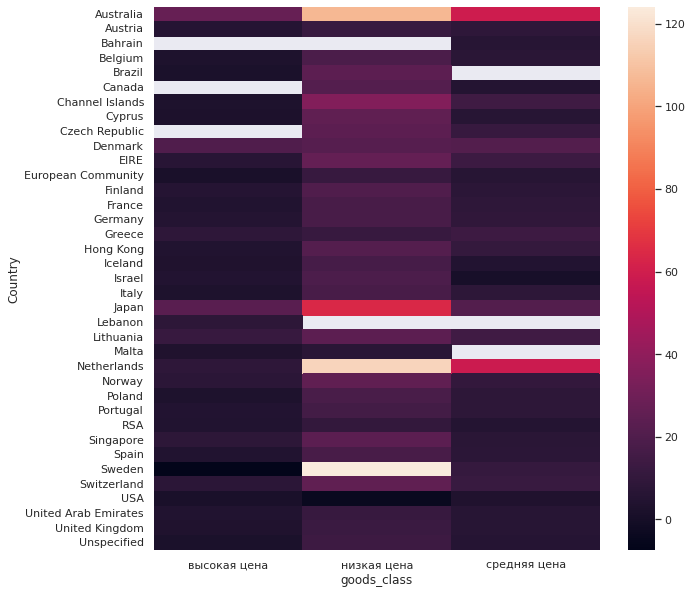

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(df_qp)

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     243
JUMBO BAG RED RETROSPOT                222
REGENCY CAKESTAND 3 TIER               204
LUNCH BAG RED RETROSPOT                175
PACK OF 72 RETROSPOT CAKE CASES        164
                                      ... 
COLOURFUL FLOWER FRUIT BOWL              1
MARIE ANTOINETTE TRINKET BOX SILVER      1
DROP DIAMANTE EARRINGS GREEN             1
HAPPY BIRTHDAY CARD TEDDY/CAKE           1
PINK VINTAGE VICTORIAN EARRINGS          1
Name: Description, Length: 3401, dtype: int64

In [ ]:
df.groupby('Description').count().sort_values('Quantity')

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unitprice,goods_class
Description,,,,,,,,,
wrongly sold as sets,1,1,1,1,1,0,1,1,1
MONEY BOX FIRST AID DESIGN,1,1,1,1,1,1,1,1,1
"MUG , DOTCOMGIFTSHOP.COM",1,1,1,1,1,0,1,1,1
MURANO STYLE GLASS BRACELET GOLD,1,1,1,1,1,1,1,1,1
NECKLACE+BRACELET SET BLUE BLOSSOM,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...
PACK OF 72 RETROSPOT CAKE CASES,164,164,164,164,164,128,164,164,152
LUNCH BAG RED RETROSPOT,175,175,175,175,175,145,175,175,175
REGENCY CAKESTAND 3 TIER,204,204,204,204,204,181,204,204,204


In [ ]:
df.groupby(['Description', 'Country']).mean().sort_values('Unitprice')

Quantity  CustomerID  Unitprice
Description          Country                                          
wrongly sold as sets United Kingdom -600.000000         NaN     0.0000
damages              United Kingdom -164.333333         NaN     0.0000
damaged              United Kingdom   -5.000000         NaN     0.0000
counted              United Kingdom -310.000000         NaN     0.0000
check                United Kingdom  -28.777778         NaN     0.0000
...                                         ...         ...        ...
Manual               Portugal          0.750000     12763.5   349.9275
                     Germany           0.000000     12473.0   549.3400
                     EIRE              0.000000     14911.0  1114.6850
                     Hong Kong        -1.000000         NaN  2583.7600
AMAZON FEE           United Kingdom   -1.000000         NaN  4423.7750

[6806 rows x 3 columns]